# Particle Image Velocimetry 

In [1]:
import openpiv.tools
import openpiv.process
import openpiv.scaling
import openpiv.validation
import openpiv.filters
import openpiv.preprocess
import numpy
import cv2
import matplotlib.pyplot
%matplotlib inline
import skimage

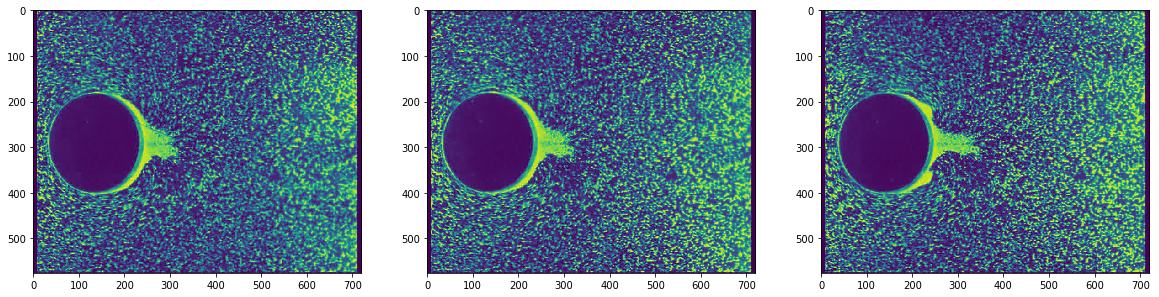

In [74]:
dt = 0.012      #time between images
path1 = 'Sequence2/all_images__00004619.jpg'
path2 = 'Sequence2/all_images__00004620.jpg'
path3 = 'Sequence2/all_images__00004624.jpg'
img_a  = openpiv.tools.imread(path1)
img_b  = openpiv.tools.imread(path2)
img_c  = openpiv.tools.imread(path3)

fig = matplotlib.pyplot.figure(figsize=[20,20])
ax = fig.add_subplot(1, 3, 1)
ax.imshow(img_a)
ax2 = fig.add_subplot(1, 3, 2)
ax2.imshow(img_b)
ax3 = fig.add_subplot(1, 3, 3)
ax3.imshow(img_c)

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


(<matplotlib.figure.Figure at 0x7f86d7c744a8>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f86d7e053c8>,
       dtype=object))

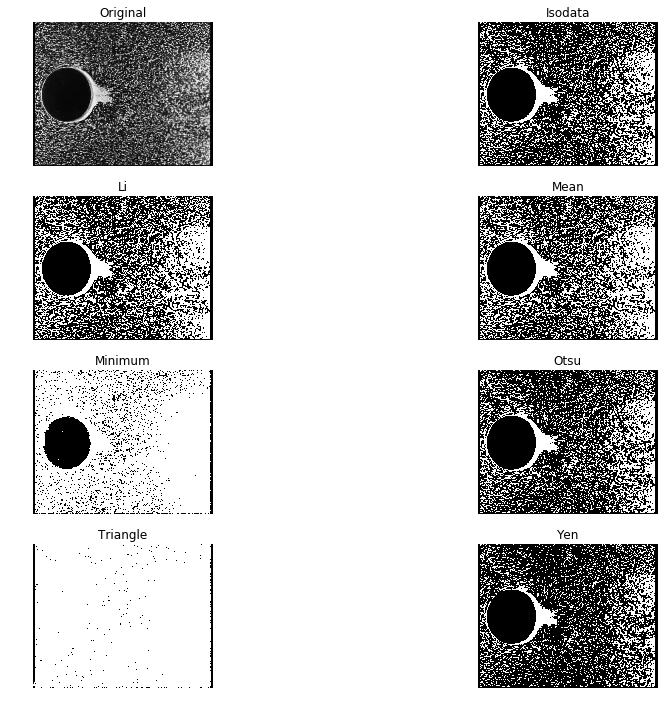

In [3]:
skimage.filters.try_all_threshold(img_a,figsize=(16, 10), verbose=True)

## Masking with opencv (cv2) - image processing package: 
### Segmentation by thresholding (region based segmentation) 

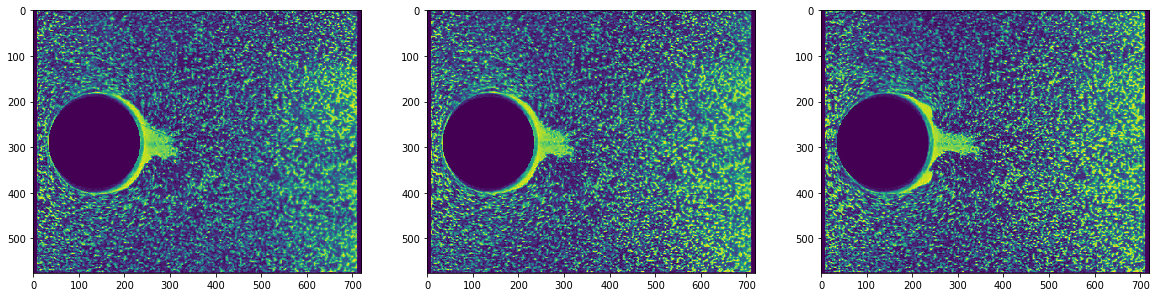

In [76]:
imga = cv2.imread(path1)
imgb = cv2.imread(path2)
imgc = cv2.imread(path3)
cv2.circle(imga, (134,290), 100, (0,0, 0), -1) #drawing a circle to mask
cv2.circle(imgb, (134,290), 100, (0,0, 0), -1) #drawing a circle to mask
cv2.circle(imgc, (134,290), 100, (0,0, 0), -1) #drawing a circle to mask
cv2.imwrite("maskSeq2img1.jpg", imga)
cv2.imwrite("maskSeq2img2.jpg", imgb)
cv2.imwrite("maskSeq2img3.jpg", imgc)
mask1 = cv2.imread('maskSeq2img1.jpg', cv2.IMREAD_GRAYSCALE) 
mask2 = cv2.imread('maskSeq2img2.jpg', cv2.IMREAD_GRAYSCALE) 
mask3 = cv2.imread('maskSeq2img3.jpg', cv2.IMREAD_GRAYSCALE) 
fig = matplotlib.pyplot.figure(figsize=[20,20])
ax = fig.add_subplot(1, 3, 1)
ax.imshow(mask1)
ax2 = fig.add_subplot(1, 3, 2)
ax2.imshow(mask2)
ax3 = fig.add_subplot(1, 3, 3)
ax3.imshow(mask3)

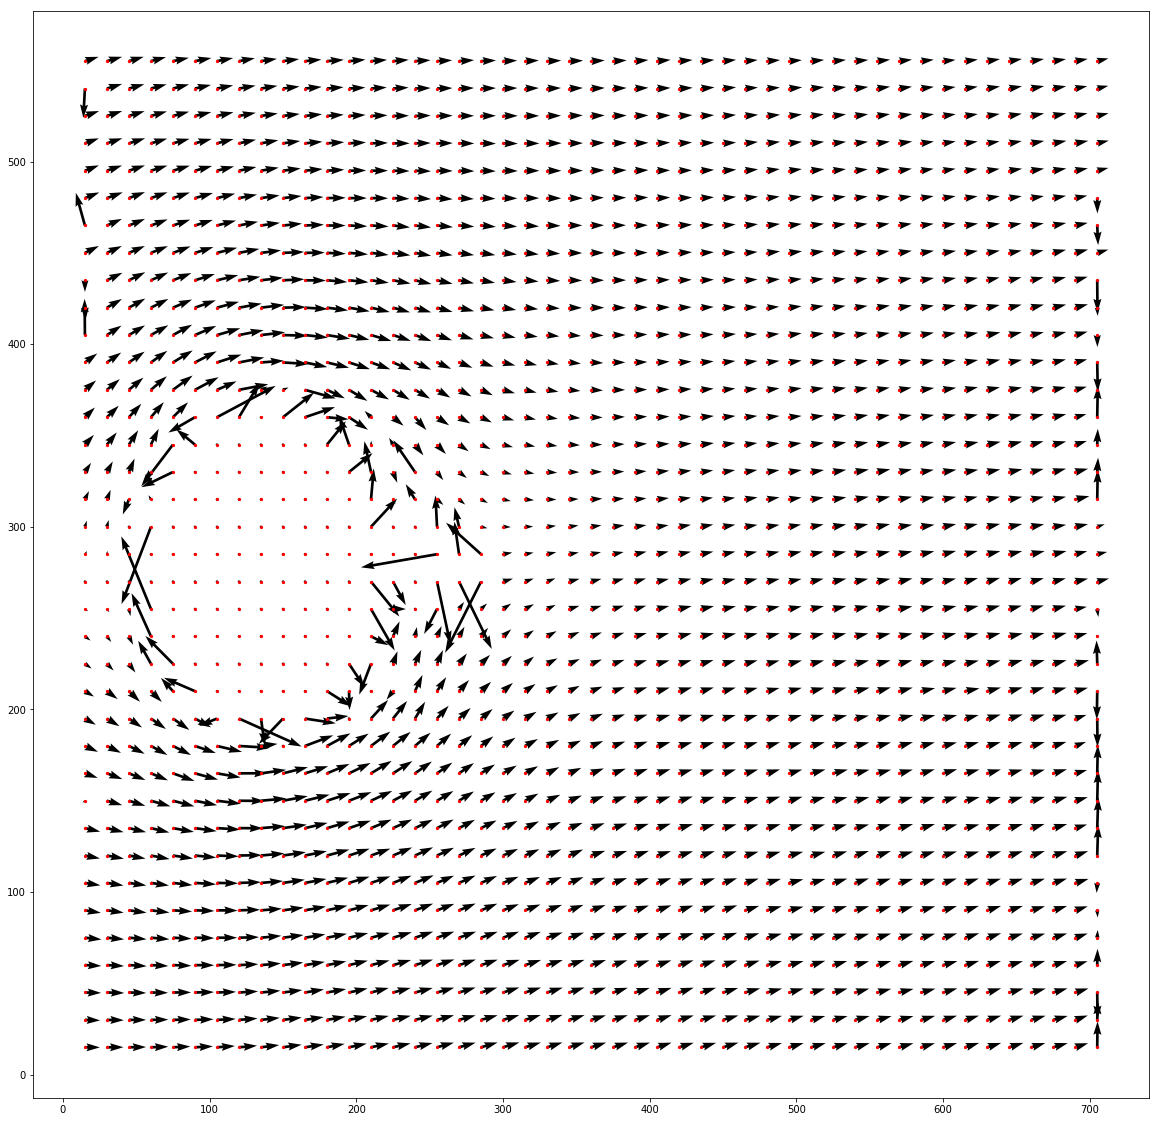

In [72]:
window_size=30 #30
search_areasize = 60 #110
overlap = 15 #15

u, v, sig2noise = openpiv.process.extended_search_area_piv(mask1.astype(numpy.int32),
                                                           mask2.astype(numpy.int32),
                                                           window_size=window_size,    #24
                                                           overlap=overlap, dt=dt, #12
                                                           search_area_size=search_areasize, 
                                                           subpixel_method= 'gaussian',
                                                           sig2noise_method='peak2peak' ) 
#'centroid' [replaces default if correlation map is negative], 
#    'gaussian' [default if correlation map is positive], 
#     'parabolic'.
#sig2noise_method specifies which method to use for the evalutaion of the signal/noise ratio.
#The function also returns a third array, sig2noise which contains the signal to noise ratio obtained 
#from each cross-correlation function, intended as the ratio between the heigth of the first and second peaks.
 # get window centers coordinates: We then compute the coordinates of the centers of the interrogation windows 
#using openpiv.process.get_coordinates().: (same options we have given in the previous command to the processing function.)
x, y = openpiv.process.get_coordinates( image_size=img_a.shape, window_size=window_size, overlap=overlap) 
fig = matplotlib.pyplot.figure(figsize=[20,20])
matplotlib.pyplot.quiver( x, y, u, v )
matplotlib.pyplot.scatter(x, y, color='r', s=5)

fig.savefig('primeiraSeq2.pdf')

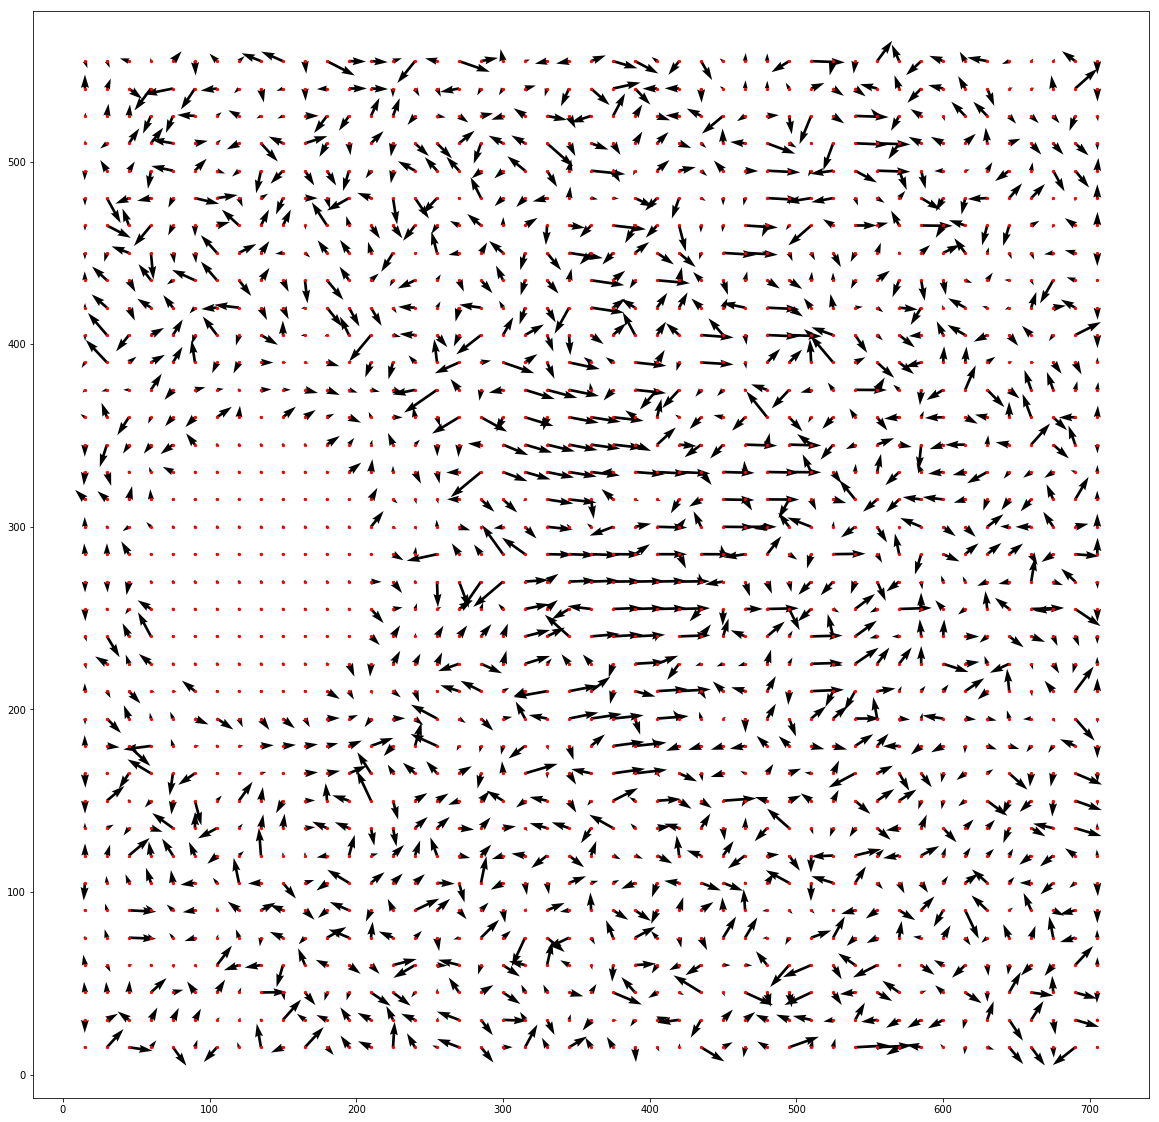

In [77]:
window_size=30 #30
search_areasize = 60 #110
overlap = 15 #15

u, v, sig2noise = openpiv.process.extended_search_area_piv(mask1.astype(numpy.int32),
                                                           mask3.astype(numpy.int32),
                                                           window_size=window_size,    #24
                                                           overlap=overlap, dt=dt, #12
                                                           search_area_size=search_areasize, 
                                                           subpixel_method= 'gaussian',
                                                           sig2noise_method='peak2peak' ) 
#'centroid' [replaces default if correlation map is negative], 
#    'gaussian' [default if correlation map is positive], 
#     'parabolic'.
#sig2noise_method specifies which method to use for the evalutaion of the signal/noise ratio.
#The function also returns a third array, sig2noise which contains the signal to noise ratio obtained 
#from each cross-correlation function, intended as the ratio between the heigth of the first and second peaks.
 # get window centers coordinates: We then compute the coordinates of the centers of the interrogation windows 
#using openpiv.process.get_coordinates().: (same options we have given in the previous command to the processing function.)
x, y = openpiv.process.get_coordinates( image_size=img_a.shape, window_size=window_size, overlap=overlap) 
fig = matplotlib.pyplot.figure(figsize=[20,20])
matplotlib.pyplot.quiver( x, y, u, v )
matplotlib.pyplot.scatter(x, y, color='r', s=5)

fig.savefig('primeiraSeq2.pdf')